In [31]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.time_series_preprocessing import (
    extract_currency_series,
    rename_columns_and_set_id,
    convert_column_to_datetime,
    convert_column_to_float,
    drop_over_limit_date,
    export_to_parquet
)

from scripts.time_series_visualization import (
    plot_raw_series,
    plot_series_acf,
    plot_series_pacf,
    checks_stationarity
)

In [32]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [33]:
df_trigo_parana = pd.read_csv("../data/raw/trigo/PREÇO MÉDIO DO TRIGO CEPEA-ESALQ - PARANÁ.csv")
df_trigo_rs = pd.read_csv("../data/raw/trigo/PREÇO MÉDIO DO TRIGO CEPEA-ESALQ - RIO GRANDE DO SUL.csv")

In [34]:
df_trigo_parana.head()

,Data,À vista R$,À vista US$
0,02/02/2004,"436,76","148,36"
1,03/02/2004,"432,87","148,35"
2,04/02/2004,"435,37","149,15"
3,05/02/2004,"432,6","147,54"
4,09/02/2004,"431,91","147,66"


In [35]:
df_trigo_rs.head()

,Data,À vista R$,À vista US$
0,02/02/2004,"396,67","134,74"
1,03/02/2004,"395,56","135,56"
2,04/02/2004,"391,67","134,18"
3,05/02/2004,"392,7","133,94"
4,09/02/2004,"404,33","138,23"


## PARANÁ

In [36]:
df_trigo_parana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5295 non-null   object
 1   À vista R$   5295 non-null   object
 2   À vista US$  5295 non-null   object
dtypes: object(3)
memory usage: 124.2+ KB


In [37]:
df_trigo_parana_brl = extract_currency_series(df_trigo_parana)
df_trigo_parana_brl.head()

,Data,À vista R$
0,02/02/2004,"436,76"
1,03/02/2004,"432,87"
2,04/02/2004,"435,37"
3,05/02/2004,"432,6"
4,09/02/2004,"431,91"


In [38]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_trigo_parana_brl = rename_columns_and_set_id(df_trigo_parana_brl, cols_dict_brl, "TRIGO_PARANA")
df_trigo_parana_brl = convert_column_to_datetime(df_trigo_parana_brl, "ds")
df_trigo_parana_brl = convert_column_to_float(df_trigo_parana_brl, "y")

df_trigo_parana_brl.head()

,ds,y,unique_id
0,2004-02-02,436.76,TRIGO_PARANA
1,2004-02-03,432.87,TRIGO_PARANA
2,2004-02-04,435.37,TRIGO_PARANA
3,2004-02-05,432.60,TRIGO_PARANA
4,2004-02-09,431.91,TRIGO_PARANA


In [39]:
df_trigo_parana_brl.tail()

,ds,y,unique_id
5290,2025-04-30,1571.96,TRIGO_PARANA
5291,2025-05-02,1567.72,TRIGO_PARANA
5292,2025-05-05,1564.92,TRIGO_PARANA
5293,2025-05-06,1556.72,TRIGO_PARANA
5294,2025-05-07,1567.66,TRIGO_PARANA


In [40]:
df_trigo_parana_brl = drop_over_limit_date(df_trigo_parana_brl, '01/05/2025', "ds")
df_trigo_parana_brl.tail()

,ds,y,unique_id
5286,2025-04-24,1579.77,TRIGO_PARANA
5287,2025-04-25,1578.32,TRIGO_PARANA
5288,2025-04-28,1573.47,TRIGO_PARANA
5289,2025-04-29,1575.95,TRIGO_PARANA
5290,2025-04-30,1571.96,TRIGO_PARANA


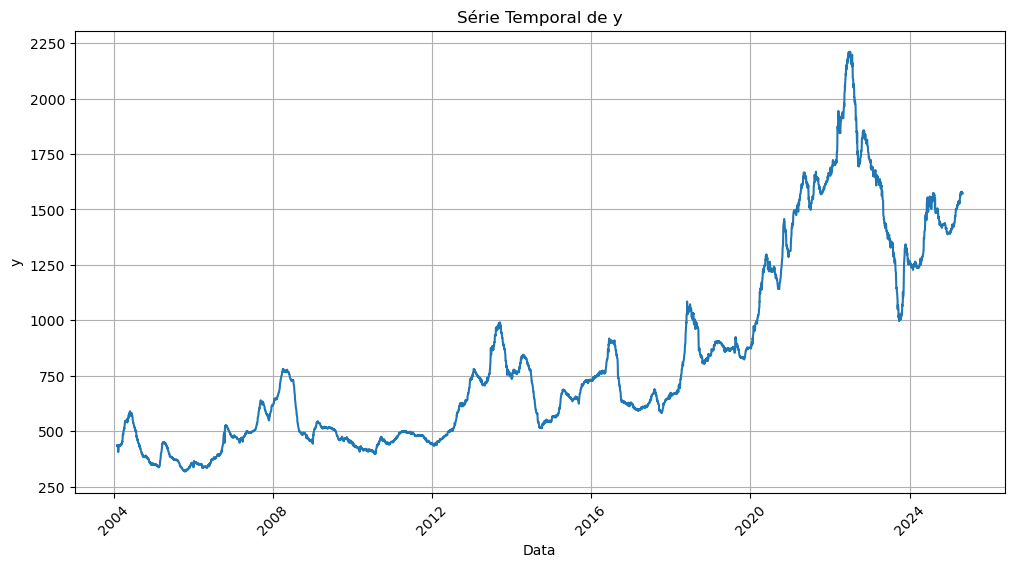

In [41]:
plot_raw_series(df_trigo_parana_brl, "y")

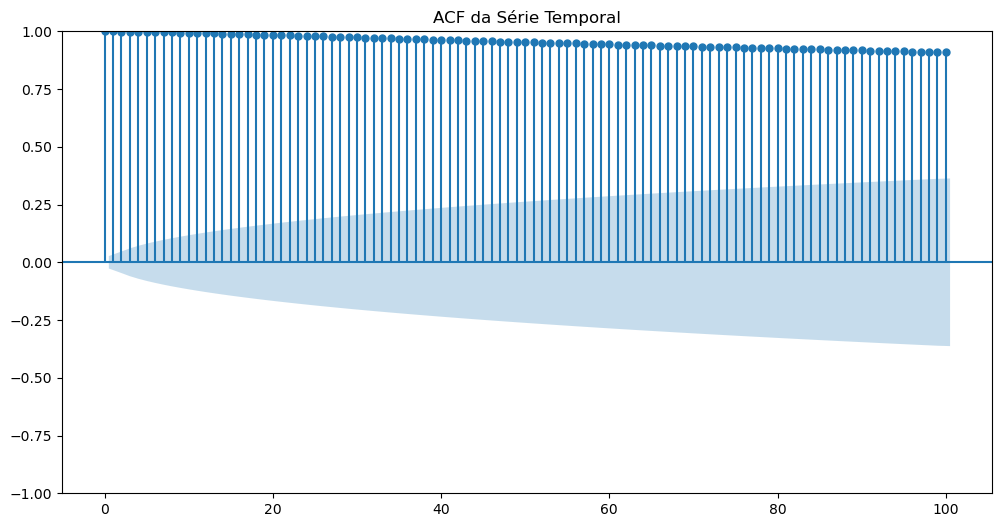

In [42]:
plot_series_acf(df_trigo_parana_brl['y'])

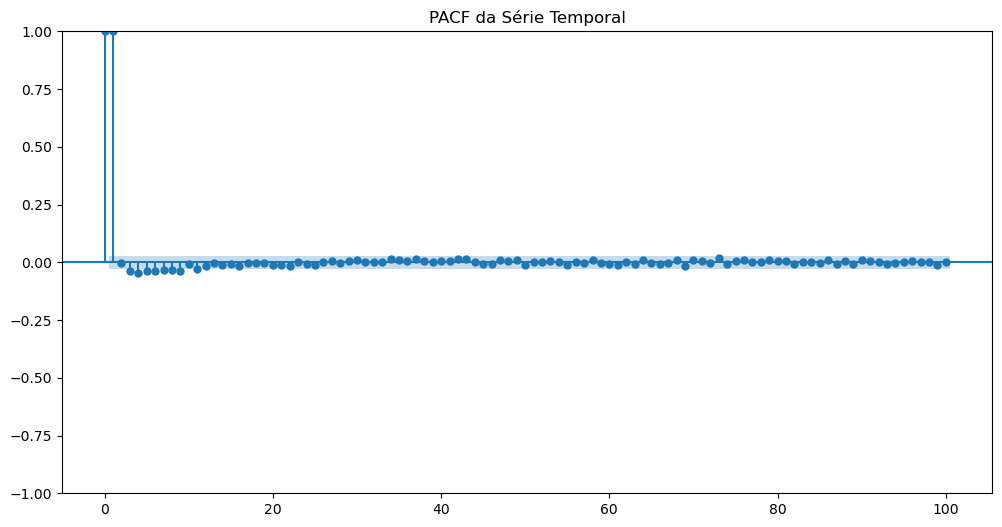

In [43]:
plot_series_pacf(df_trigo_parana_brl['y'])

In [44]:
checks_stationarity(df_trigo_parana_brl['y'])

ADF Statistic: -1.0469690672428682
p-value: 0.7357504874324121
Críticos: {'1%': np.float64(-3.4315935836377207), '5%': np.float64(-2.8620895354945057), '10%': np.float64(-2.567062517378618)}
❌ Série não é estacionária.


In [45]:
export_to_parquet(df_trigo_parana_brl, "../data/trigo/trigo_parana_brl.parquet")

Arquivo salvo em: ../data/trigo/trigo_parana_brl.parquet


## RS

In [46]:
df_trigo_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5289 non-null   object
 1   À vista R$   5289 non-null   object
 2   À vista US$  5289 non-null   object
dtypes: object(3)
memory usage: 124.1+ KB


In [47]:
df_trigo_rs_brl = extract_currency_series(df_trigo_rs)
df_trigo_rs_brl.head()

,Data,À vista R$
0,02/02/2004,"396,67"
1,03/02/2004,"395,56"
2,04/02/2004,"391,67"
3,05/02/2004,"392,7"
4,09/02/2004,"404,33"


In [48]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_trigo_rs_brl = rename_columns_and_set_id(df_trigo_rs_brl, cols_dict_brl, "TRIGO_RS")
df_trigo_rs_brl = convert_column_to_datetime(df_trigo_rs_brl, "ds")
df_trigo_rs_brl = convert_column_to_float(df_trigo_rs_brl, "y")

df_trigo_rs_brl.head()

,ds,y,unique_id
0,2004-02-02,396.67,TRIGO_RS
1,2004-02-03,395.56,TRIGO_RS
2,2004-02-04,391.67,TRIGO_RS
3,2004-02-05,392.70,TRIGO_RS
4,2004-02-09,404.33,TRIGO_RS


In [49]:
df_trigo_rs_brl.tail()

,ds,y,unique_id
5284,2025-04-30,1471.23,TRIGO_RS
5285,2025-05-02,1477.98,TRIGO_RS
5286,2025-05-05,1471.74,TRIGO_RS
5287,2025-05-06,1457.64,TRIGO_RS
5288,2025-05-07,1465.32,TRIGO_RS


In [50]:
df_trigo_rs_brl = drop_over_limit_date(df_trigo_rs_brl, '01/05/2025', "ds")
df_trigo_rs_brl.tail()

,ds,y,unique_id
5280,2025-04-24,1476.85,TRIGO_RS
5281,2025-04-25,1476.85,TRIGO_RS
5282,2025-04-28,1483.36,TRIGO_RS
5283,2025-04-29,1473.82,TRIGO_RS
5284,2025-04-30,1471.23,TRIGO_RS


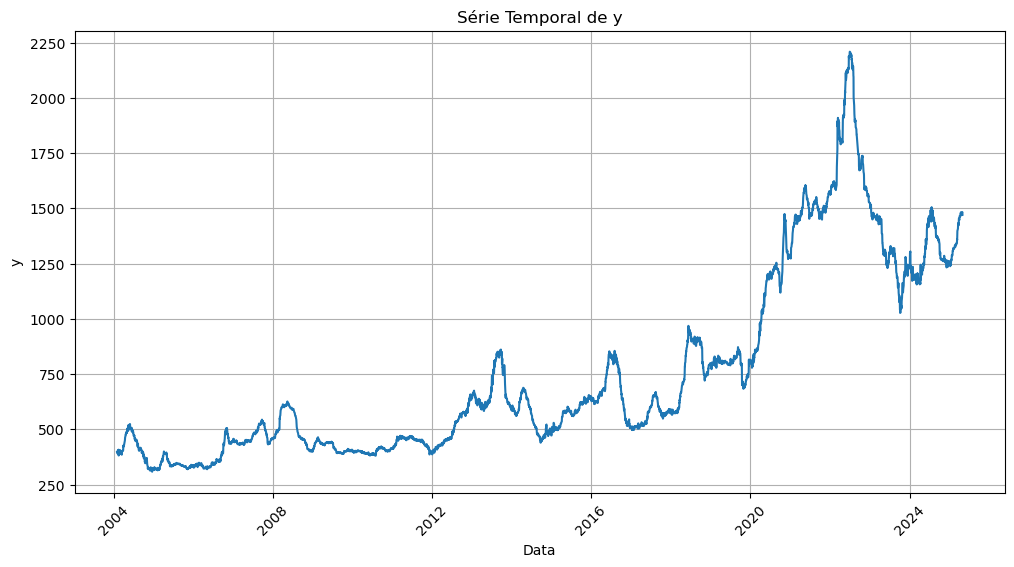

In [51]:
plot_raw_series(df_trigo_rs_brl, "y")

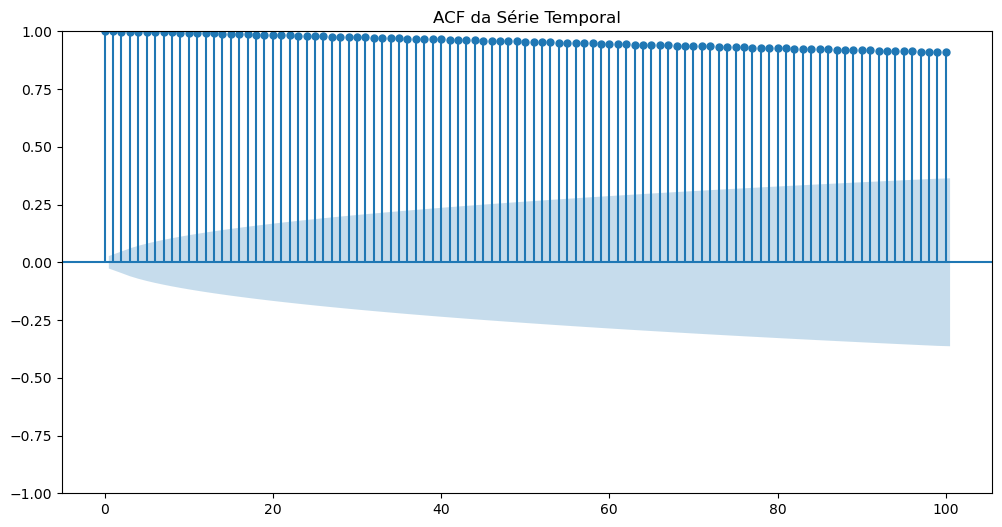

In [52]:
plot_series_acf(df_trigo_rs_brl['y'])

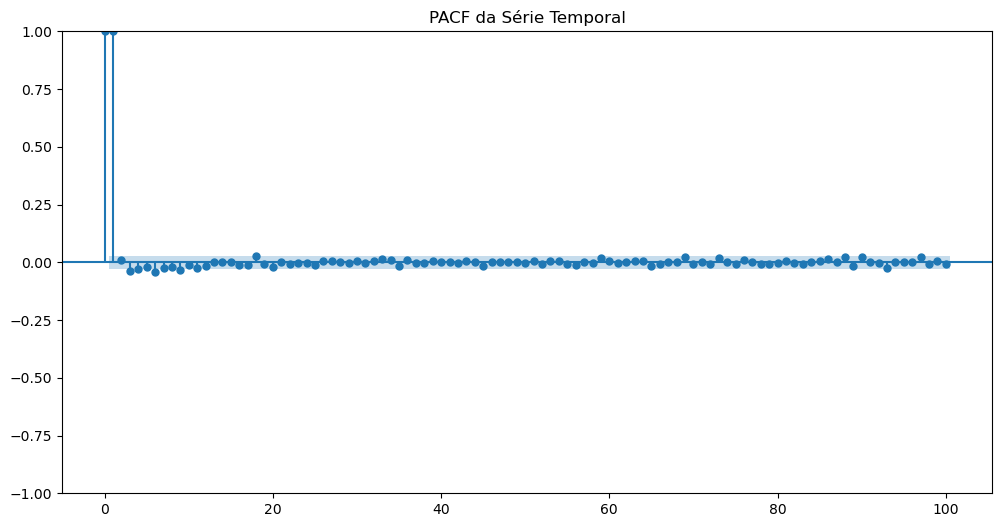

In [53]:
plot_series_pacf(df_trigo_rs_brl['y'])

In [54]:
checks_stationarity(df_trigo_rs_brl['y'])

ADF Statistic: -1.0166715206890624
p-value: 0.7471352865810106
Críticos: {'1%': np.float64(-3.431594767229596), '5%': np.float64(-2.862090058410377), '10%': np.float64(-2.567062795745212)}
❌ Série não é estacionária.


In [55]:
export_to_parquet(df_trigo_rs_brl, "../data/trigo/trigo_rs_brl.parquet")

Arquivo salvo em: ../data/trigo/trigo_rs_brl.parquet
